# Relax Challenge

### A user table ( "takehome_users" ) with data on 12,000 users who signed up for the product in the last two years. This table includes:
<ul>
<li>name: the user's name</li>
<li>object_id: the user's id</li>
<li>email: email address</li>
<li>creation_source: how their account was created. This takes on one of 5 values:</li>
 <ul>
    <li> PERSONAL_PROJECTS: invited to join another user's personal workspace</li>
    <li> GUEST_INVITE: invited to an organization as a guest (limited permissions)</li>
    <li> ORG_INVITE: invited to an organization (as a full member)</li>
    <li> SIGNUP: signed up via the website
    <li> SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login
id)</li>
    </ul>
<li>creation_time: when they created their account</li>
<li>last_session_creation_time: unix timestamp of last login</li>
<li>opted_in_to_mailing_list: whether they have opted into receiving marketing emails </li>
<li>enabled_for_marketing_drip: whether they are on the regular marketing email drip </li>
<li>org_id: the organization (group of users) they belong to </li>
<li>invited_by_user_id: which user invited them to join (if applicable)</li>
    </ul>
    
## A usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product.
Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday period , identify which factors predict future user adoption. <br>
We suggest spending 1 to 2 hours on this, but you're welcome to spend more or less.
Please send us a brief writeup of your findings (the more concise, the better no
more than one page), along with any summary tables, graphs, code, or queries that can help
us understand your approach. Please note any factors you considered or investigation
you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
users = pd.read_csv('takehome_users.csv')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


## Step1. Check "adoption"

In [5]:
login = pd.read_csv('takehome_user_engagement.csv', index_col = 0)
login.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [6]:
login.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  207917 non-null  int64
 1   visited  207917 non-null  int64
dtypes: int64(2)
memory usage: 4.8+ MB


In [7]:
np.unique(login['user_id']).shape

(8823,)

In [8]:
np.unique(login['visited'])

array([1])

In [9]:
from datetime import datetime, date

login.index = pd.to_datetime(login.index.astype(str))

bydate = []
for m in range(len(login.index)):
    bydate.append(login.index[m].date())
login['date'] = bydate
login.tail()

,user_id,visited,date
time_stamp,,,
2013-09-06 06:14:15,11996,1,2013-09-06
2013-01-15 18:28:37,11997,1,2013-01-15
2014-04-27 12:45:16,11998,1,2014-04-27
2012-06-02 11:55:59,11999,1,2012-06-02
2014-01-26 08:57:12,12000,1,2014-01-26


In [10]:
def adopt(df):
    sorted_data = df.sort_index()
    for i in range(len(sorted_data)):
        count = 1
        for j in range(i,len(sorted_data)):
            if (sorted_data.date[j] - sorted_data.date[i]).days < 7:
                count += 1
                j += 1
            else: i += 1
        if count >=3:
            return 'True'
            break
    else:
        return 'False'

In [11]:
adopt_check = []
adopt_num = []
for num in np.unique(login['user_id']):
    df = login[login['user_id'] == num]
    adopt_num.append(num)
    adopt_check.append(adopt(df))
adopted = pd.DataFrame(zip(adopt_num, adopt_check), columns = ['object_id', 'adopt'])
print(adopted.head())

# This step is not nessicessory: the rows are for seperate days.
# sorted_data.index = pd.to_datetime(sorted_data.index.astype(str))
# result = sorted_data.resample('D').count()
# result.head()

   object_id  adopt
0          1  False
1          2   True
2          3  False
3          4  False
4          5  False


In [12]:
np.unique(adopted['adopt'], return_counts = True)

(array(['False', 'True'], dtype=object), array([6639, 2184]))

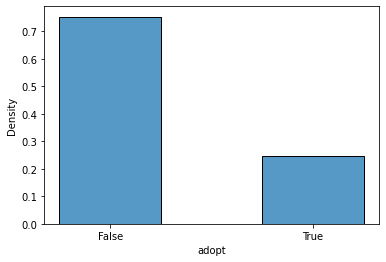

In [178]:
sns.histplot(x= adopted['adopt'], stat = 'density', shrink = 0.5, common_norm=False)
plt.show()

## Step2. Join two tables and cleaning

In [130]:
joined = adopted.join(users, on='object_id', how='left', lsuffix='_login', rsuffix='_info', sort=True)
joined.head()

,object_id,object_id_login,adopt,object_id_info,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,1,False,2.0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0.0,0.0,1.0,316.0
1,2,2,True,3.0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0.0,0.0,94.0,1525.0
2,3,3,False,4.0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0.0,0.0,1.0,5151.0
3,4,4,False,5.0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0.0,0.0,193.0,5240.0
4,5,5,False,6.0,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0.0,0.0,197.0,11241.0


In [131]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   8823 non-null   int64  
 1   object_id_login             8823 non-null   int64  
 2   adopt                       8823 non-null   object 
 3   object_id_info              8822 non-null   float64
 4   creation_time               8822 non-null   object 
 5   name                        8822 non-null   object 
 6   email                       8822 non-null   object 
 7   creation_source             8822 non-null   object 
 8   last_session_creation_time  6473 non-null   float64
 9   opted_in_to_mailing_list    8822 non-null   float64
 10  enabled_for_marketing_drip  8822 non-null   float64
 11  org_id                      8822 non-null   float64
 12  invited_by_user_id          4714 non-null   float64
dtypes: float64(6), int64(2), object(5

In [132]:
joined.describe()

,object_id,object_id_login,object_id_info,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,8823.000000,8823.000000,8822.000000,6.473000e+03,8822.000000,8822.000000,8822.000000,4714.000000
mean,6019.821716,6019.821716,6020.143845,1.379332e+09,0.248243,0.147359,141.544208,5963.086126
std,3464.251001,3464.251001,3463.862122,1.951044e+07,0.432018,0.354483,124.174288,3401.072698
min,1.000000,1.000000,2.000000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3017.500000,3017.500000,3018.250000,1.363236e+09,0.000000,0.000000,29.000000,3043.750000
50%,6034.000000,6034.000000,6034.500000,1.382839e+09,0.000000,0.000000,107.000000,5958.500000
75%,9029.500000,9029.500000,9029.250000,1.398484e+09,0.000000,0.000000,238.000000,8857.750000
max,12000.000000,12000.000000,12000.000000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


### 2.1. Drop rows and columns

In [133]:
joined.object_id_info.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
8818    False
8819    False
8820    False
8821    False
8822     True
Name: object_id_info, Length: 8823, dtype: bool

In [134]:
joined.drop(index = 8822, inplace = True)

In [135]:
joined.set_index(joined.object_id, inplace = True)

In [136]:
joined.tail()

,object_id,object_id_login,adopt,object_id_info,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,,,,,
11995,11995,11995,False,11996.0,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0.0,0.0,89.0,8263.0
11996,11996,11996,False,11997.0,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0.0,0.0,200.0,NaN
11997,11997,11997,False,11998.0,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1.0,1.0,83.0,8074.0
11998,11998,11998,False,11999.0,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0.0,0.0,6.0,NaN
11999,11999,11999,False,12000.0,2014-01-26 08:57:12,Lima Tha�s,ThaisMeloLima@hotmail.com,SIGNUP,1.390727e+09,0.0,1.0,0.0,NaN


In [137]:
joined.drop(columns = ['object_id', 'object_id_login', 'object_id_info', 'name', 'email'], axis =1, inplace = True)
joined.head()

,adopt,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,
1,False,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0.0,0.0,1.0,316.0
2,True,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0.0,0.0,94.0,1525.0
3,False,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0.0,0.0,1.0,5151.0
4,False,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0.0,0.0,193.0,5240.0
5,False,2013-12-17 03:37:06,GUEST_INVITE,1.387424e+09,0.0,0.0,197.0,11241.0


### 2.2. Fill NANs and covert columns

In [138]:
joined['last_session_creation_time'].fillna((joined['last_session_creation_time'].median()), inplace=True)
joined['last_session_creation_time'].isna().any()

False

In [140]:
joined.creation_time = pd.to_datetime(joined.creation_time.astype(str))
days = [(np.max(joined.creation_time).date() -x.date()).days for x in joined.creation_time]
joined.creation_time = days
joined.head()

,adopt,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,
1,False,196,ORG_INVITE,1.396238e+09,0.0,0.0,1.0,316.0
2,True,437,ORG_INVITE,1.363735e+09,0.0,0.0,94.0,1525.0
3,False,374,GUEST_INVITE,1.369210e+09,0.0,0.0,1.0,5151.0
4,False,498,GUEST_INVITE,1.358850e+09,0.0,0.0,193.0,5240.0
5,False,164,GUEST_INVITE,1.387424e+09,0.0,0.0,197.0,11241.0


In [141]:
invited = [(x>=0) for x in joined.invited_by_user_id]
joined.invited_by_user_id = invited
np.unique(invited, return_counts = True)

(array([False,  True]), array([4108, 4714]))

In [175]:
# from dython.nominal import associations
# from dython.data_utils import split_hist
# associations(joined, figsize=(12, 12))
# plt.show()

## Step3. Make predictions using RandomForestClassifier

In [143]:
categorical_cols = ['creation_source', 'invited_by_user_id']
dummies_X = pd.get_dummies(joined,columns =categorical_cols, drop_first = True)
print(dummies_X.shape)
target = dummies_X.adopt
X_all = dummies_X.drop(columns = ['adopt'], axis =1)

(8822, 11)


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

# check version number
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from collections import Counter

y =  target
X = X_all

over = SMOTE(sampling_strategy=1)
X, y = over.fit_resample(X, y)
print(Counter(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)   

0.8.0
Counter({'False': 6638, 'True': 6638})


In [145]:
# Metrics calculation
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

              precision    recall  f1-score   support

       False       0.75      0.85      0.80      1355
        True       0.82      0.71      0.76      1301

    accuracy                           0.78      2656
   macro avg       0.79      0.78      0.78      2656
weighted avg       0.79      0.78      0.78      2656

[[1157  198]
 [ 378  923]]


## Step 4. Varible importance and split histogram

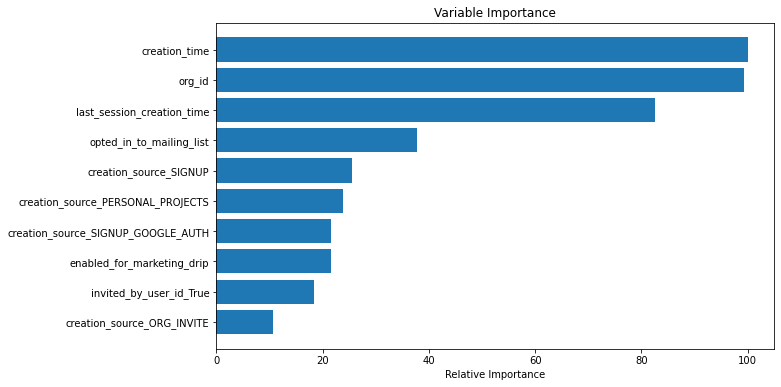

In [184]:
# Plot feature_importance for powerpoint use
feature_importance = RF.feature_importances_
# print(feature_importance)
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0])
# print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

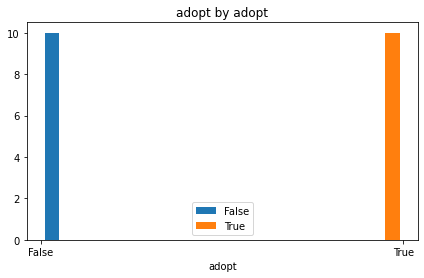

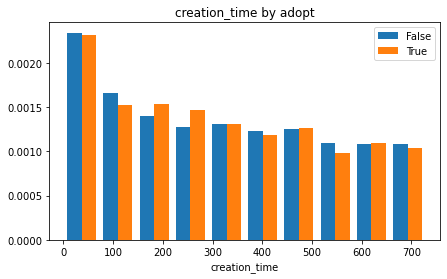

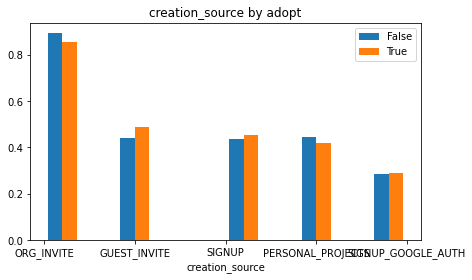

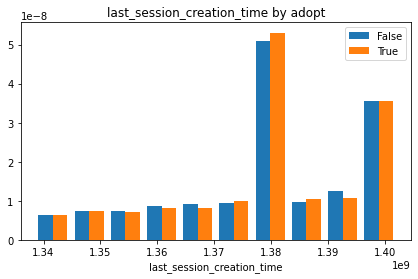

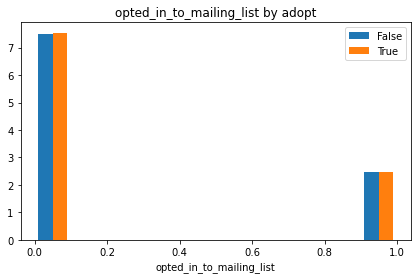

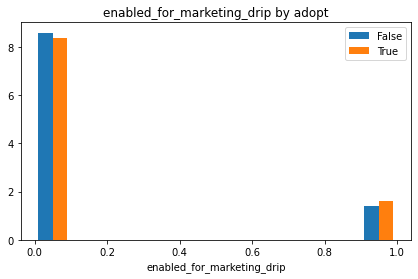

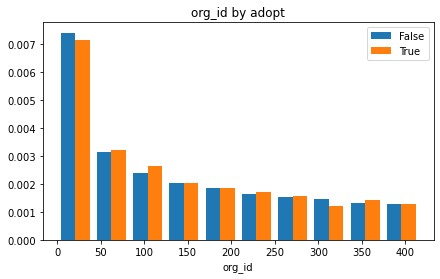

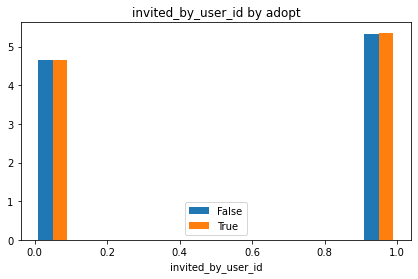

In [187]:
for column in joined.columns:
    split_hist(joined, column, 'adopt', density = True, bins=10, figsize=(7,4))

In [188]:
# # print(joined.columns)
# joined_columns = [
#     'creation_time', 'creation_source',
#        'last_session_creation_time', 'opted_in_to_mailing_list',
#        'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']
# for col in joined_columns: 
#     sns.histplot(x=joined[col], hue=joined['adopt'], multiple="dodge", 
#                   stat = 'density', shrink = 0.8, common_norm=False)
#     plt.xticks(rotation=90)
#     plt.show()